In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2025-07-01 16:44:25.843434: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 16:44:25.859846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751388265.876017    3288 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751388265.881844    3288 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-01 16:44:25.903993: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Importing Dataset

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

### Plotting Some Images

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

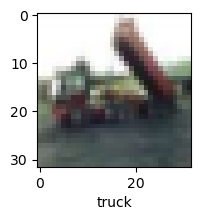

In [7]:
plot_sample(X_train,y_train, 2)

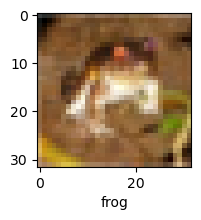

In [8]:
plot_sample(X_train,y_train, 0)

Normalizing: The values are between 0-255, so dividing those to make it in range between 0-1

In [9]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## Trying previous method of ANN

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

2025-07-01 16:45:19.709802: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1751388319.710465    3288 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/5


I0000 00:00:1751388324.089917    3426 service.cc:148] XLA service 0x79b484006e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751388324.090488    3426 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-07-01 16:45:24.137880: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751388324.234531    3426 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-01 16:45:26.216290: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38_0', 276 bytes spill stores, 276 bytes spill loads

2025-07-01 16:45:26.280664: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38

  12/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.1098 - loss: 2.4197

I0000 00:00:1751388329.569987    3426 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1387/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2937 - loss: 1.9491

2025-07-01 16:45:44.390833: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45', 112 bytes spill stores, 112 bytes spill loads

2025-07-01 16:45:44.761537: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38_0', 276 bytes spill stores, 276 bytes spill loads

2025-07-01 16:45:44.842083: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38', 280 bytes spill stores, 336 bytes spill loads



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.3001 - loss: 1.9346
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4164 - loss: 1.6481
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4520 - loss: 1.5515 
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4727 - loss: 1.4949 
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4971 - loss: 1.4300


In [21]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4570 - loss: 1.5001  


[1.5014517307281494, 0.4560999870300293]

In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s -39585us/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.42      0.50      1000
           1       0.36      0.86      0.50      1000
           2       0.32      0.50      0.39      1000
           3       0.37      0.33      0.35      1000
           4       0.58      0.19      0.29      1000
           5       0.47      0.34      0.39      1000
           6       0.53      0.53      0.53      1000
           7       0.66      0.47      0.55      1000
           8       0.54      0.65      0.59      1000
           9       0.60      0.27      0.37      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



## Building Convolutional Neural Network (CNN) 

In [15]:
cnn = models.Sequential([
    # First convolutional layer: extracts 32 feature maps using 3x3 filters
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),

    # Downsamples the feature maps using 2x2 pooling (reduces size and computation)
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer: extracts 64 feature maps using 3x3 filters
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

    # Another 2x2 pooling to reduce spatial dimensions further
    layers.MaxPooling2D((2, 2)),

    # Flattens the 2D feature maps into a 1D vector for the dense layers
    layers.Flatten(),

    # Fully connected layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),

    # Output layer with 10 neurons (for 10 classes) and softmax for probabilities
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s -2397us/step - accuracy: 0.3744 - loss: 1.7105
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6021 - loss: 1.1447  
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6556 - loss: 0.9949 
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6809 - loss: 0.9222 
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7007 - loss: 0.8527  
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7212 - loss: 0.8010 
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s -4403us/step - accuracy: 0.7377 - loss: 0.7535
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7514 - loss: 0.7130
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s -4555us/step - accuracy: 0.7639 - loss: 0.6785
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7773 - loss: 0.6469 


In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6776 - loss: 0.9572


[0.9735613465309143, 0.6747000217437744]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step   


array([[1.37303257e-02, 2.08250131e-03, 1.94354020e-02, 8.75620469e-02,
        5.48077922e-04, 6.02965988e-03, 1.06301450e-03, 2.49944478e-05,
        8.68982613e-01, 5.41333924e-04],
       [7.33573595e-03, 9.24570203e-01, 1.72076898e-06, 3.91038157e-06,
        3.54392107e-08, 1.32760745e-08, 2.91122035e-07, 2.81867152e-09,
        6.56944364e-02, 2.39367271e-03],
       [1.16774626e-01, 3.84868622e-01, 2.09321640e-03, 7.27255363e-03,
        2.29997589e-04, 9.87838866e-05, 2.21020033e-04, 6.56635547e-03,
        4.71506506e-01, 1.03683472e-02],
       [8.97561669e-01, 4.63170633e-02, 2.04653498e-02, 2.34075077e-03,
        6.40924554e-04, 9.64589617e-06, 8.95766643e-05, 1.12097128e-04,
        3.03031541e-02, 2.15975521e-03],
       [8.90646334e-07, 3.10518990e-05, 1.11746155e-02, 1.21994009e-02,
        5.28019786e-01, 3.72609124e-04, 4.47570205e-01, 1.95986658e-07,
        6.30963827e-04, 2.60625768e-07]], dtype=float32)

In [20]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.83      0.68      1000
           1       0.71      0.86      0.78      1000
           2       0.64      0.53      0.58      1000
           3       0.50      0.45      0.47      1000
           4       0.68      0.57      0.62      1000
           5       0.60      0.58      0.59      1000
           6       0.73      0.75      0.74      1000
           7       0.79      0.71      0.75      1000
           8       0.75      0.79      0.77      1000
           9       0.80      0.67      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



### Hence the accuracy is better with CNN as the testing score for ANN is  0.45 and CNN is 0.67. Further more the f1 score came better in CNN